# K-means

K-means é uma técnica de agrupamento de dados que consiste em um algoritmo que busca separar *n* observações ao longo de *k* grupos onde cada observação pertence ao grupo mais próximo da média/ centroide.

Fundamentalmente o algoritmo é estruturado em 4 etapas sendo elas:
1. Inicialização K centroides de forma aleatoria
2. Atribuição dos pontos observados com base ao centroide mais proximo
3. Atualização dos centro de agrupamento com base nos pontos atribuidos
4. Repetir etapas 2 e 3 ate atingir a convergencia


Referências:
- https://benalexkeen.com/k-means-clustering-in-python/
- https://scikit-learn.org/stable/modules/clustering.html#k-means

## Setup


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


## Inicialização dos centroides

{1: 'r', 2: 'g', 3: 'b'}


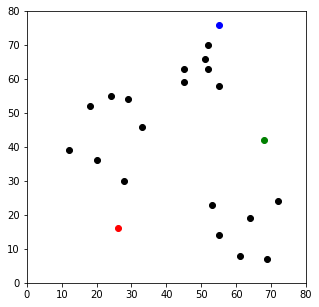

In [0]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## Atribuição dos pontos observados com base ao centroide mais proximo

${\underset {\mathbf {C} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} _{j}\in C_{i}}\left\|\mathbf {x} _{j}-{\boldsymbol {\mu }}_{i}\right\|^{2}$ 

onde:
- $C_{i}$ é o agrupamento da classe $i$.
- $μ_{i}$ é o centro do agrupamento $i$.
- ${x} _{j}$ amostra do conjuto de dados.

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


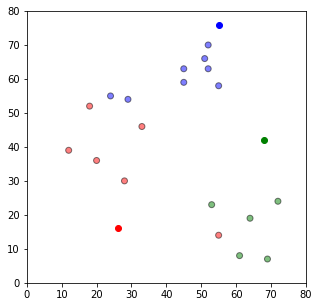

In [0]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## Atualização dos centro de agrupamento com base nos pontos atribuidos

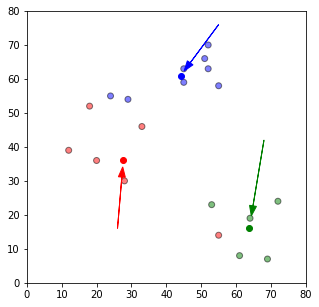

In [0]:
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

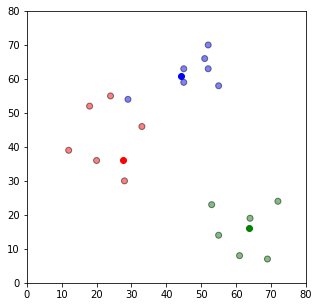

In [0]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## Repetir etapas 2 e 3 ate atingir a convergencia

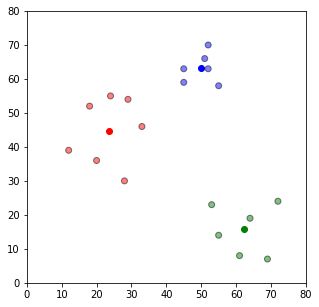

In [0]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

Portanto, temos 3 grupos claros com 3 médias no centro desses clusters.


## Utilizando a biblioteca Sklearn

Agora, repetiremos o procedimento acima usando o scikit-learn; 

In [0]:
from sklearn.cluster import KMeans

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
colmap = {1: 'r', 2: 'g', 3: 'b'}

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

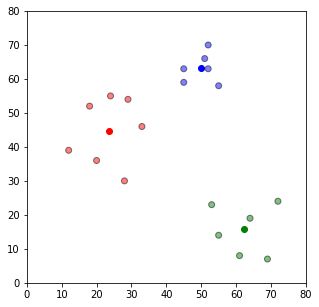

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

Algumas coisas a serem observadas:

O cluster k-means é muito sensível à escala devido à sua dependência da distância euclidiana, portanto, normalize os dados se houver problemas de dimensionamento.
Se houver simetrias em seus dados, alguns dos rótulos podem estar incorretamente rotulados
Recomenda-se fazer o mesmo k-means com diferentes centróides iniciais e usar o rótulo mais comum.

# Aplicação conjunto Iris

Imagine que você é um botânico que procura uma maneira automatizada de categorizar cada flor de íris que encontrar. O aprendizado de máquina fornece muitos algoritmos para classificar flores estatisticamente. Por exemplo, um sofisticado programa de aprendizado de máquina pode classificar flores com base em fotografias. Nossas ambições são mais modestas - vamos classificar as flores de íris com base nas medidas de comprimento e largura de suas sépalas e pétalas.

--- 

O conjunto de dados consiste de 150 amostras contendo 4 medidas de distancia entre as sépalas e pétalas conforme figura 2. As amostras correspondem a uma das 3 espécies (*Iris setosa*, *Iris virginica* e *Iris versicolor*) referente a figura 1

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

<table>
  <tr><td>
    <img src="https://miro.medium.com/max/1400/0*7H_gF1KnslexnJ3s"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2. Estrutura do conjuto de dados</b> <a href="https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983">Image-Credit</a>
  </td></tr>
</table>


## Leitura do conjunto de dados

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

iris = datasets.load_iris()
x = iris.data
y = iris.target



(120, 4)
(30, 4)
(120,)
(30,)


## Analisando conjunto de dados

In [90]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
#df['Species'] = list(map(lambda x: iris.target_names[x],iris.target))
df['Species'] = iris.target
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)     Species
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.0

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualização da distribuição dos atributos entre espécies 

<Figure size 432x288 with 0 Axes>

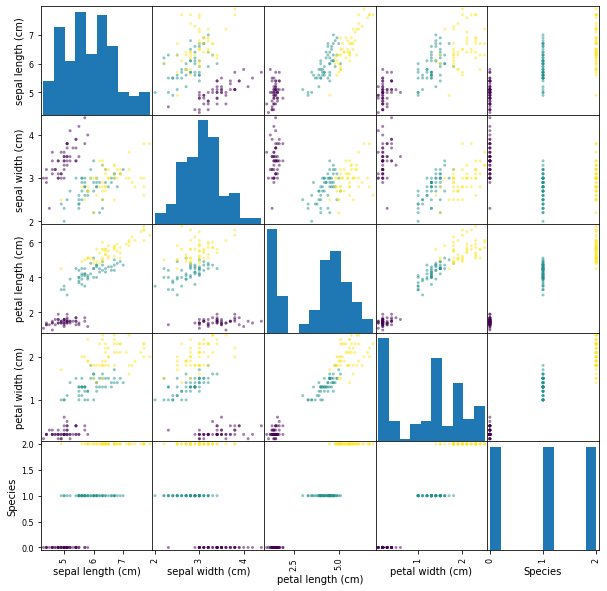

<Figure size 432x288 with 0 Axes>

In [23]:
pd.plotting.scatter_matrix(df,figsize=(10,10),c=df.Species)
plt.figure()

## Utilização do algoritmo no conjunto de dados

In [62]:
km = KMeans(n_clusters=3)

km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
centers = km.cluster_centers_
print(centers)
y_pred = km.labels_

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## Comparação visual

Text(0.5, 1.0, 'Classes Preditas')

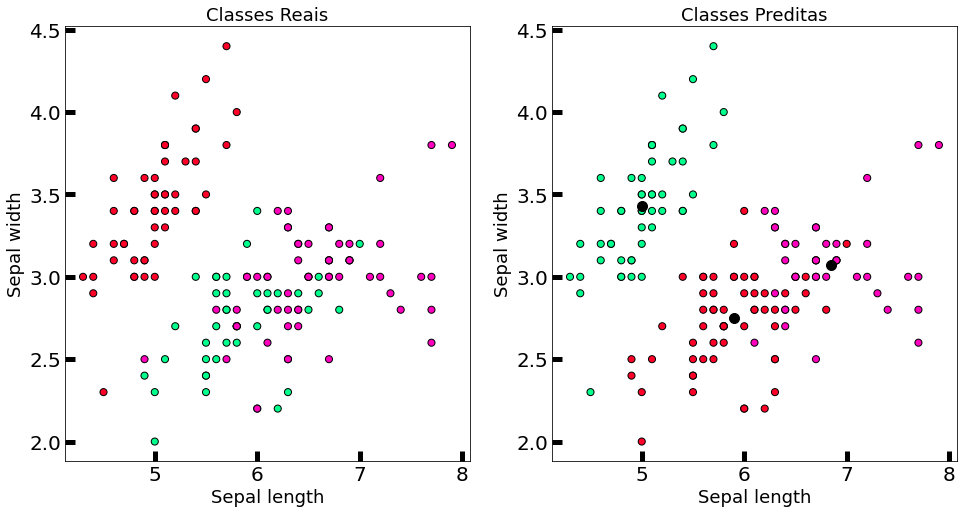

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=50)
axes[1].scatter(x[:, 0], x[:, 1], c=y_pred, cmap='gist_rainbow',
edgecolor='k', s=50)
axes[1].scatter(centers[:, 0], centers[:, 1], color='k',s=100)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Classes Reais', fontsize=18)
axes[1].set_title('Classes Preditas', fontsize=18)

Text(0.5, 1.0, 'Classes Preditas')

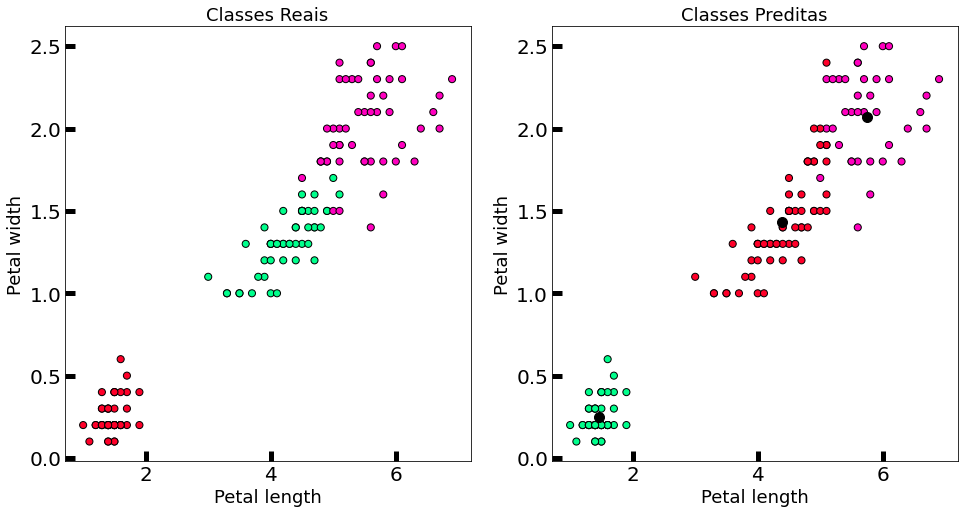

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 2], x[:, 3], c=y, cmap='gist_rainbow',
edgecolor='k', s=50)
axes[1].scatter(x[:, 2], x[:, 3], c=y_pred, cmap='gist_rainbow',
edgecolor='k', s=50)
axes[1].scatter(centers[:, 2], centers[:, 3], color='k',s=100)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Classes Reais', fontsize=18)
axes[1].set_title('Classes Preditas', fontsize=18)

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
km.inertia_

78.85144142614601

In [96]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
def maplabel(x):
  if x == 0:
    return 1
  elif x == 1:
    return 0
  elif x == 2:
    return 2

y_prednorm = list(map(maplabel,y_pred))

## Analise de performace enquanto categorização das espécies

In [107]:

print(classification_report(y,y_prednorm))
print()
print(confusion_matrix(y,y_prednorm))
print()
print(f'{accuracy_score(y,y_prednorm)*100} %')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150


[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

89.33333333333333 %
